# <a id='toc1_'></a>[Unsupervised Machine Learning: Clustering](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Unsupervised Machine Learning: Clustering](#toc1_)    
  - [I. Data Import](#toc1_1_)    
  - [II. Data Overview](#toc1_2_)    
  - [III. Data Standardization](#toc1_3_)    
  - [IV. Clustering](#toc1_4_)    
    - [IV.1. Clustering](#toc1_4_1_)    
      - [IV.1.1. Elbow technique](#toc1_4_1_1_)    
      - [IV.1.2. Principle component analysis](#toc1_4_1_2_)    
      - [IV.1.3. K-means clustering](#toc1_4_1_3_)    
      - [IV.1.4. Aggregrations](#toc1_4_1_4_)    
  - [V. Reflections](#toc1_5_)    
  - [VI. Data Export](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[I. Data Import](#toc0_)

In [286]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
import pylab as pl

from sklearn.preprocessing import StandardScaler

# clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [287]:
# current working directory
cwd = os.getcwd()

# get the parent directory path
repo_dir = os.path.dirname(cwd)

In [288]:
# read dataset 'salary-explored.pkl'
df = pd.read_pickle(os.path.join(repo_dir, 'data', 'prepared-data', 'salary-explored.pkl'))

## <a id='toc1_2_'></a>[II. Data Overview](#toc0_)

In [289]:
# make sure pandas display all columns
pd.set_option('display.max_columns', None)

# change the display format to non-scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [290]:
# check outputs of the df
df.head(3)

,id,survey_year,timestamp,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,manage_staff,years_of_exp_with_data_jobs,number_of_companies_worked_for,number_of_team_members,number_of_company_employees,number_of_db_servers,education,education_is_computer_related,certifications,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed,month,salary_category
0,0,2017,2017-01-05 05:10:20,200000.00,United States,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,150K-200K
1,1,2017,2017-01-05 05:26:23,61515.00,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),Not Provided,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,1,50K-100K
2,2,2017,2017-01-05 05:32:57,95000.00,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,50K-100K


In [291]:
# check number of rows and columns
df.shape

(6860, 29)

In [292]:
df.dtypes

id                                              int64
survey_year                                     int64
timestamp                              datetime64[ns]
salary_in_usd                                 float64
country                                        object
primary_db                                     object
years_of_exp_with_primary_db                    int64
other_dbs                                      object
employment_status                              object
job_title                                      object
manage_staff                                   object
years_of_exp_with_data_jobs                     int64
number_of_companies_worked_for                 object
number_of_team_members                         object
number_of_company_employees                    object
number_of_db_servers                            int64
education                                      object
education_is_computer_related                  object
certifications              

In [293]:
df.describe()

,id,survey_year,salary_in_usd,years_of_exp_with_primary_db,years_of_exp_with_data_jobs,number_of_db_servers,hours_worked_per_week,month
count,6860.00,6860.00,6860.00,6860.00,6860.00,6860.00,6860.00,6860.00
mean,3442.53,2017.71,92487.91,10.80,7.17,257.19,43.12,6.85
std,1990.99,0.68,50504.61,6.07,6.33,6276.04,6.48,5.49
min,0.00,2017.00,1050.00,0.00,0.00,0.00,3.00,1.00
25%,1717.75,2017.00,65000.00,6.00,3.00,6.00,40.00,1.00
50%,3438.50,2018.00,90000.00,10.00,5.00,20.00,40.00,12.00
75%,5163.25,2018.00,115000.00,15.00,10.00,70.50,45.00,12.00
max,6892.00,2019.00,1000000.00,38.00,40.00,500000.00,100.00,12.00


**Observation:** The maximum value of the number of database servers seems to be an outlier. Further investigation is needed.

In [294]:
df['number_of_db_servers'].sort_values(ascending=False).head(20)

3775    500000
2653    100000
598      50000
2109     40000
1593     40000
2016     24000
1182     20000
4176     20000
5439     20000
4293     20000
116      20000
2768     11000
4385     10000
6555     10000
1546     10000
656      10000
105      10000
1491     10000
1352     10000
68       10000
Name: number_of_db_servers, dtype: int64

**Observation:** It seems values higher than 50000 are extreme regarding the number of database servers.

In [295]:
# exclude extreme values in column number_of_db_servers
df = df[df['number_of_db_servers'] <= 50000]

In [296]:
# check number of rows and columns
df.shape

(6858, 29)

In [297]:
# create a subset of df with only numerical columns
numericals = df[['salary_in_usd', 'years_of_exp_with_primary_db', 'years_of_exp_with_data_jobs', 'number_of_db_servers', 'hours_worked_per_week']]

## <a id='toc1_3_'></a>[III. Data Standardization](#toc0_)

In [298]:
# standazing the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numericals)
print(scaled_df)

[[ 2.16552552 -0.13219297 -0.34275869  0.14618846  0.29021647]
 [-0.61993235  0.69182028 -0.65861989 -0.1052636  -1.25397204]
 [ 0.05357783 -0.95620621  2.81585335 -0.05659546  0.29021647]
 ...
 [-1.05268049 -0.13219297  1.86826974 -0.13365335 -0.48187778]
 [ 0.75756039  1.51583352  1.55240853 -0.05659546 -0.17304008]
 [-0.15761694  1.35103088  1.86826974 -0.12148631 -0.48187778]]


## <a id='toc1_4_'></a>[IV. Clustering](#toc0_)

### <a id='toc1_4_1_'></a>[IV.1. Clustering](#toc0_)

#### <a id='toc1_4_1_1_'></a>[IV.1.1. Elbow technique](#toc0_)

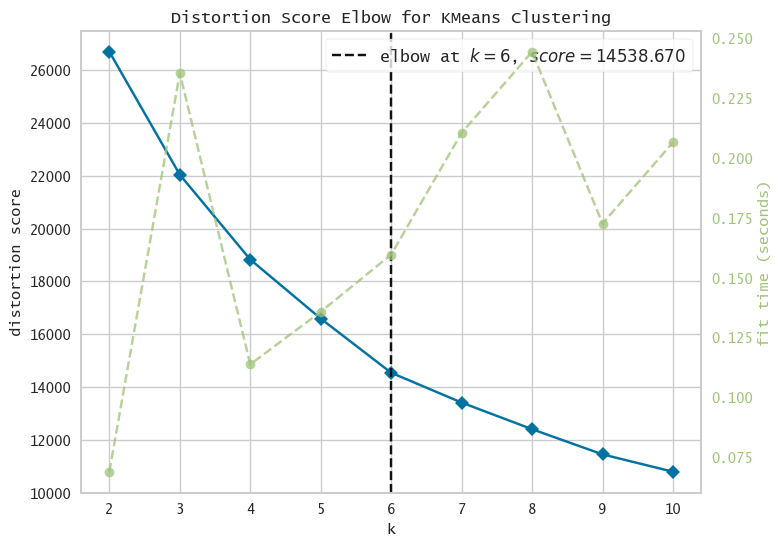

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [299]:
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(scaled_df)
elbow_graph.show()

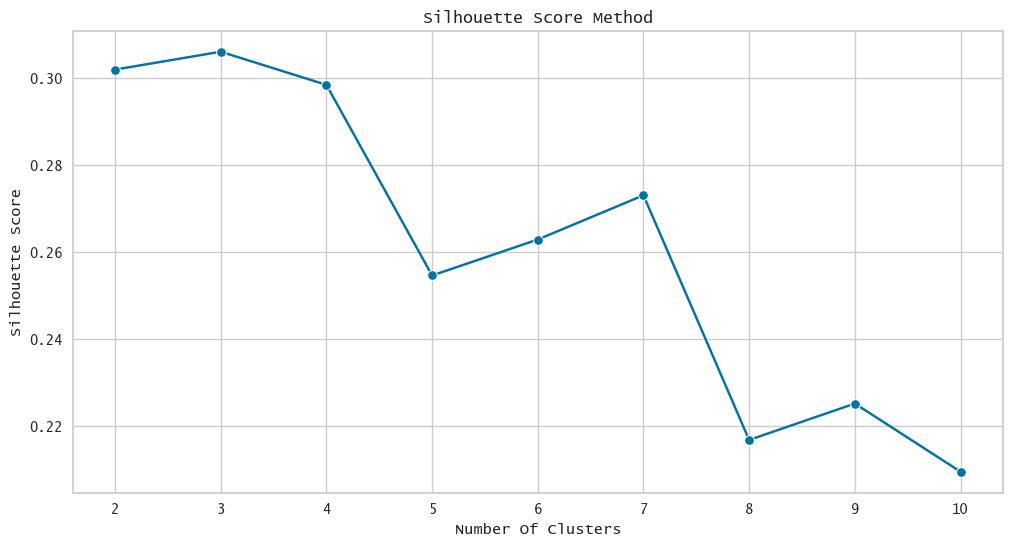

In [300]:
# calculate the silhouette score
clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
s_scores = [] # silhouette scores

for n in clusters:
    kmeans = KMeans(n_clusters = n, random_state=43).fit(scaled_df)
    silhouette = silhouette_score(scaled_df, kmeans.labels_)
    s_scores.append(silhouette)

plt.figure(figsize=(12,6))
sns.lineplot(x=clusters, y=s_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### <a id='toc1_4_1_2_'></a>[IV.1.2. Principle component analysis](#toc0_)

Explained Variance Ratio For n_components=1 is 34.10053703341776


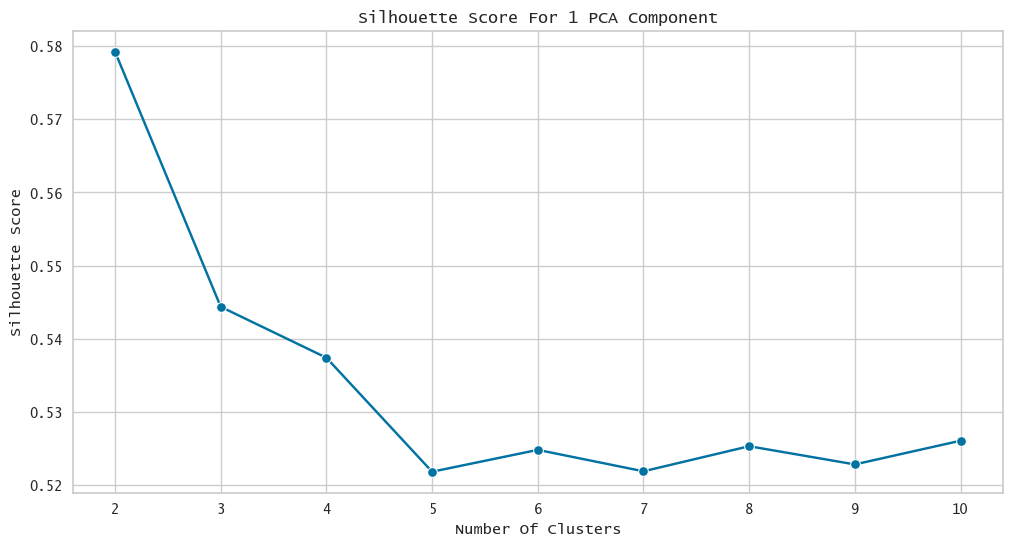

Explained Variance Ratio For n_components=2 is 55.18502840452402


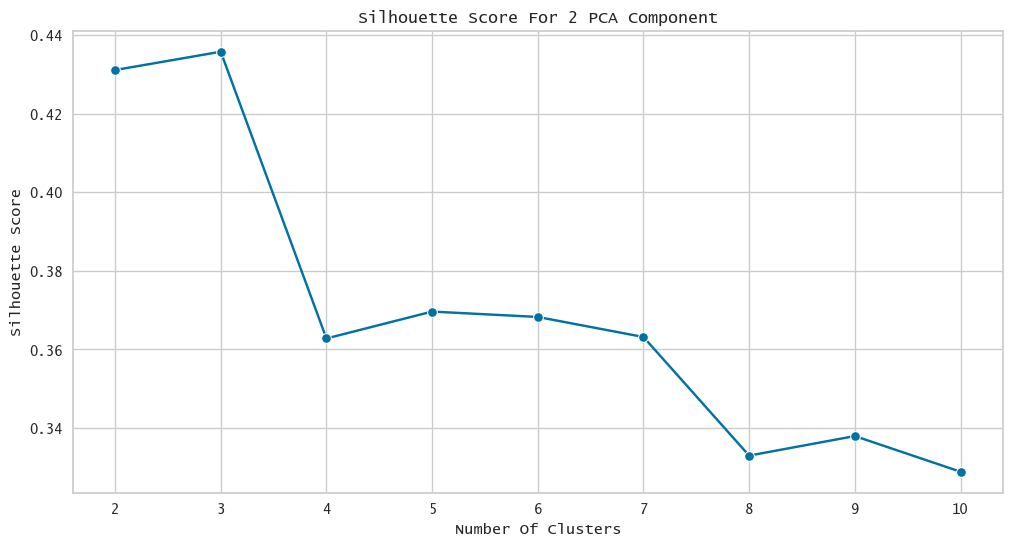

Explained Variance Ratio For n_components=3 is 74.59085494244661


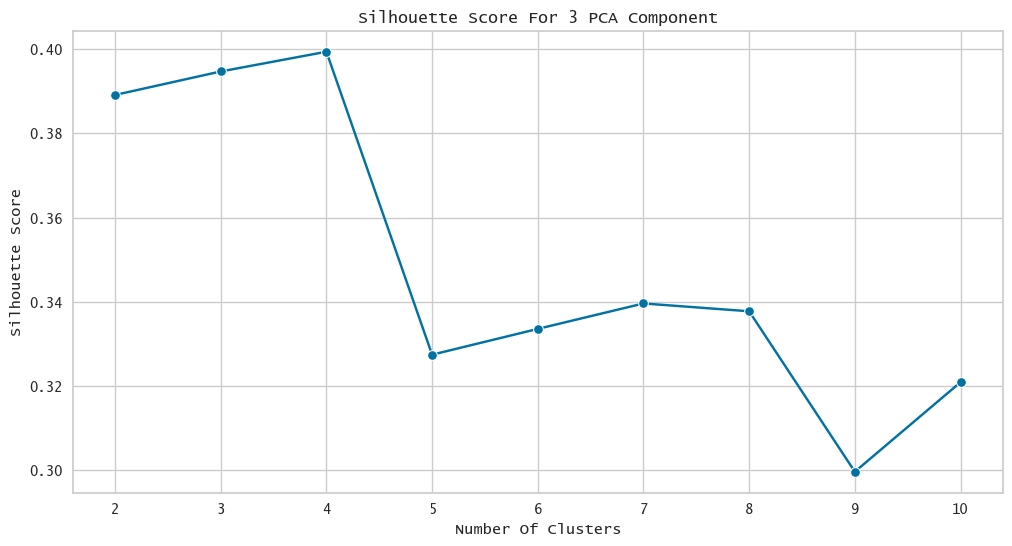

Explained Variance Ratio For n_components=4 is 89.61924558696181


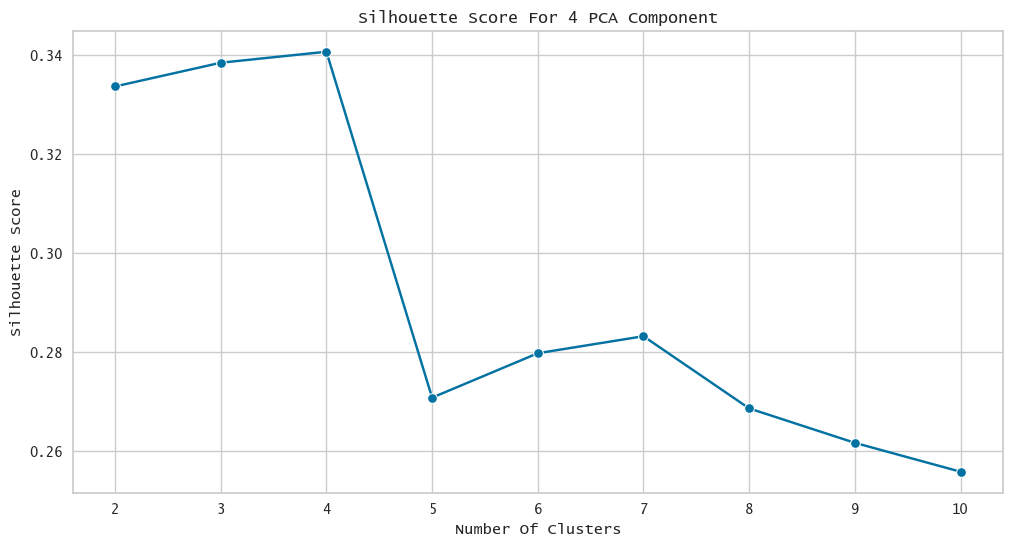

Explained Variance Ratio For n_components=5 is 100.0


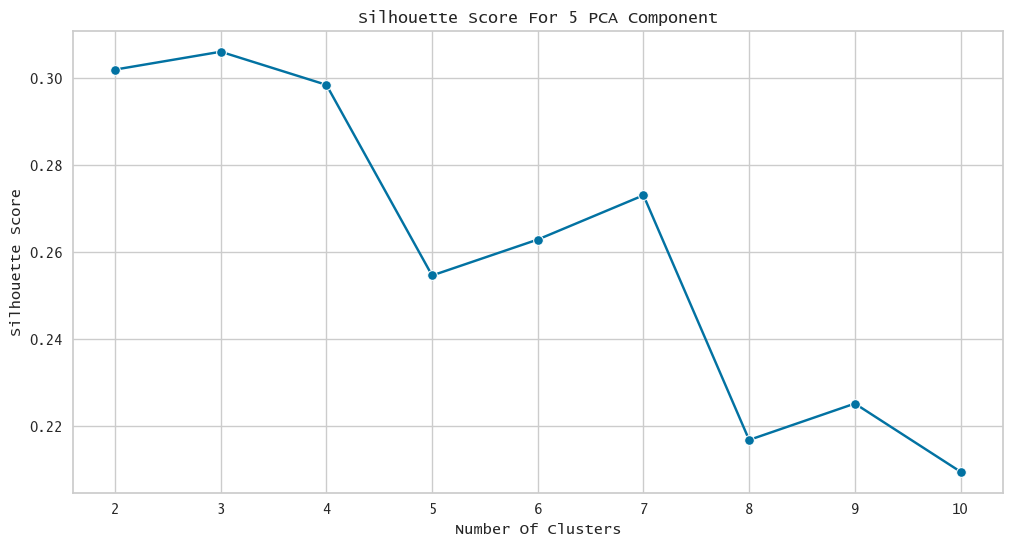

In [301]:
# block of code to find out the number of n_components vs silhouette score
components = [1,2,3,4,5]

for n in components:
    pca = PCA(n_components = n, random_state=43)
    pca.fit(scaled_df)
    pca_df = pca.transform(scaled_df)
    print('Explained Variance Ratio For n_components={} is {}'.format(n,pca.explained_variance_ratio_.sum() * 100))
    
    clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
    s_scores = [] # silhouette scores
    for k in clusters:
        kmeans = KMeans(n_clusters = k, random_state=43).fit(pca_df)
        silhouette = silhouette_score(pca_df, kmeans.labels_)
        s_scores.append(silhouette)

    plt.figure(figsize=(12,6))
    sns.lineplot(x=clusters, y=s_scores, marker='o')
    plt.title('Silhouette Score For {} PCA Component'.format(n))
    plt.xlabel('Number Of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

#### <a id='toc1_4_1_3_'></a>[IV.1.3. K-means clustering](#toc0_)

In [302]:
pca = PCA(n_components=4, random_state=43)
pca.fit(scaled_df)

PCA(n_components=4, random_state=43)

In [303]:
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [304]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(pca_df)
df['cluster'] = clusters
pca_df['cluster'] = clusters

In [305]:
df.head(5)

,id,survey_year,timestamp,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,manage_staff,years_of_exp_with_data_jobs,number_of_companies_worked_for,number_of_team_members,number_of_company_employees,number_of_db_servers,education,education_is_computer_related,certifications,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed,month,salary_category,cluster
0,0,2017,2017-01-05 05:10:20,200000.00,United States,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,150K-200K,3
1,1,2017,2017-01-05 05:26:23,61515.00,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),Not Provided,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,1,50K-100K,3
2,2,2017,2017-01-05 05:32:57,95000.00,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,50K-100K,1
3,3,2017,2017-01-05 05:33:03,56000.00,United Kingdom,Microsoft SQL Server,6,Not Provided,Full time employee,DBA,No,2,Not Asked,None,Not Asked,500,Associates (2 years),No,"No, I never have",40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,50K-100K,0
4,4,2017,2017-01-05 05:34:34,35000.00,France,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,No,10,Not Asked,None,Not Asked,30,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,0-50K,0


In [307]:
df['cluster'].value_counts()

0    2580
3    2145
1    1131
4     975
5      18
2       9
Name: cluster, dtype: int64

In [309]:
pca_df['cluster'].value_counts()

0    2580
3    2145
1    1131
4     975
5      18
2       9
Name: cluster, dtype: int64

In [310]:
# set up the parameters
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Lucida Console'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

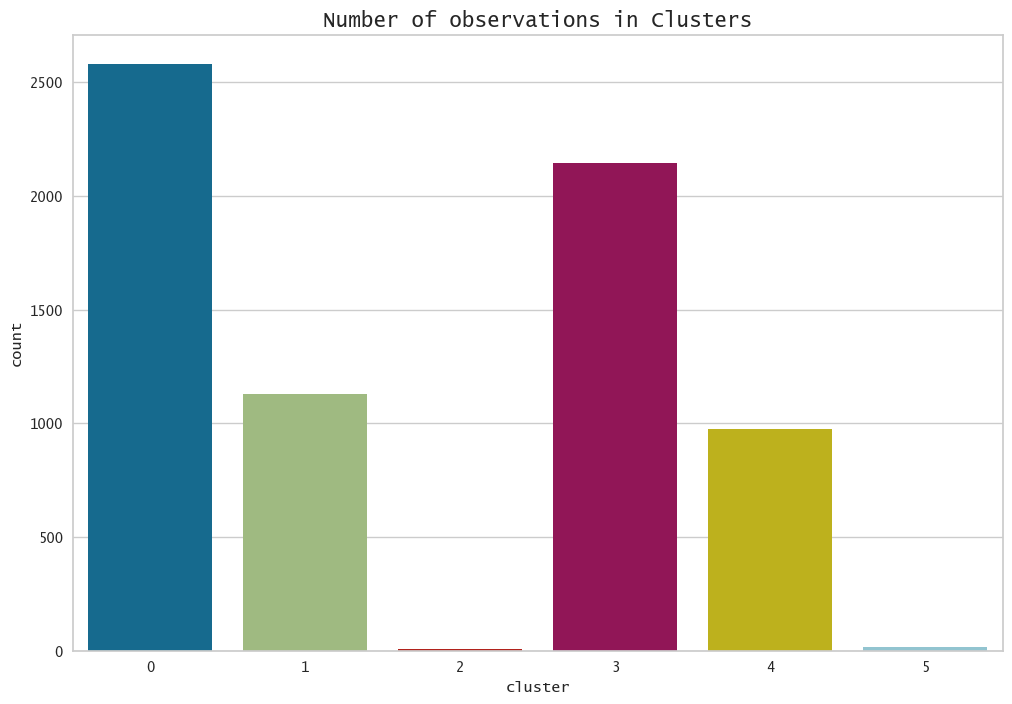

In [312]:
# count plot to see number of observations in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', data=df)
plt.title('Number of observations in Clusters', size=15)
plt.show()

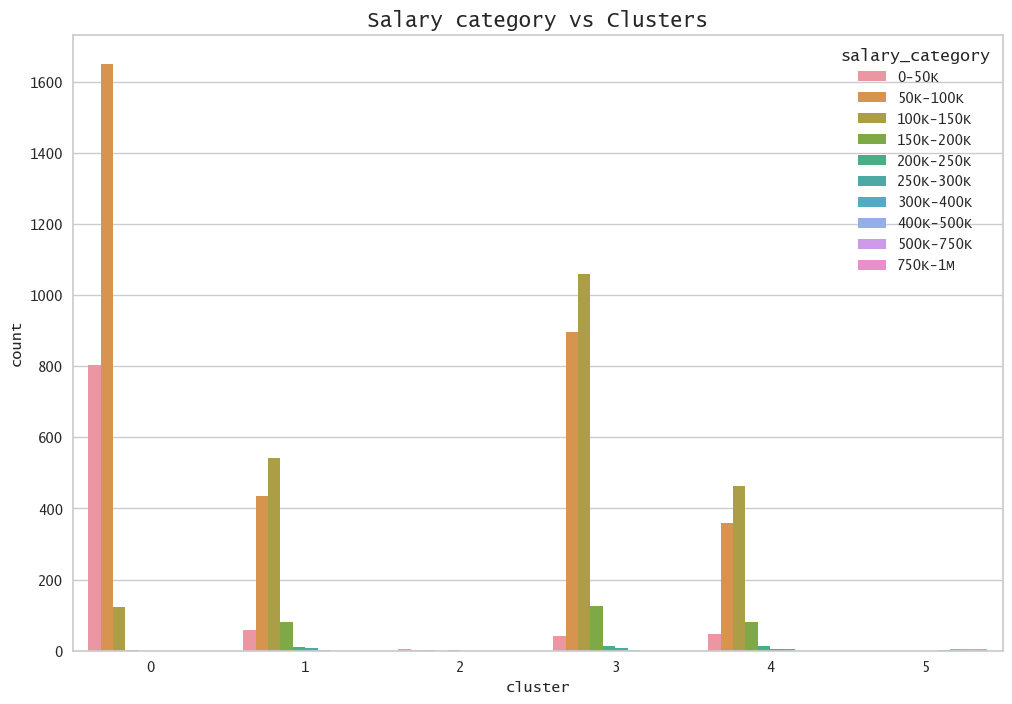

In [313]:
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', data=df, hue='salary_category')
plt.title('Salary category vs Clusters', size=15)
plt.show()

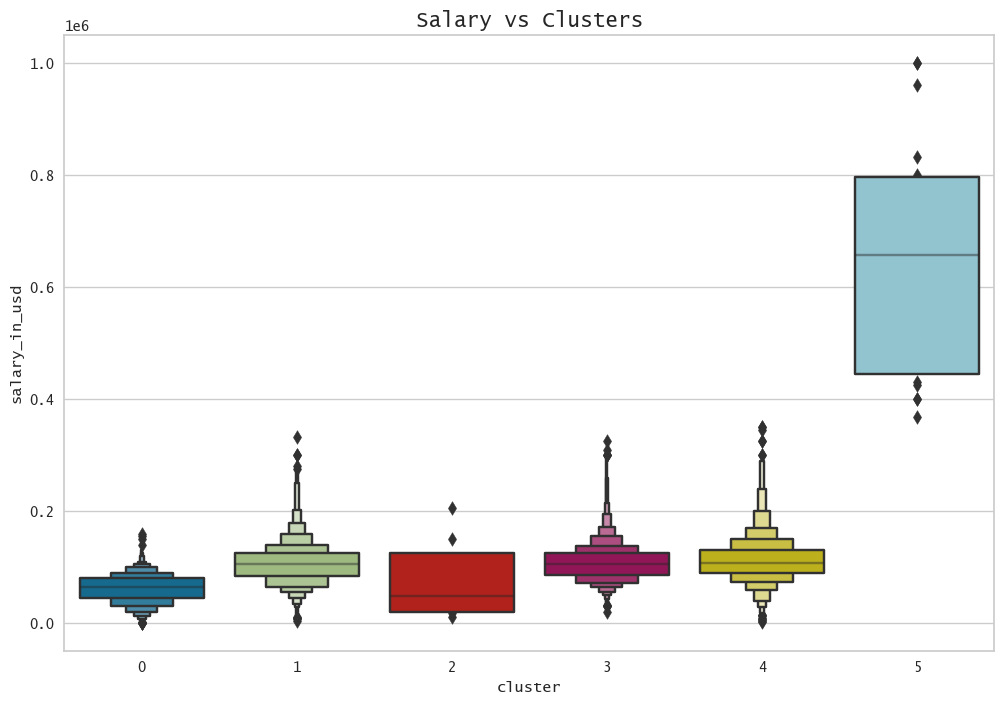

In [314]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df['cluster'], y=df['salary_in_usd'])
plt.title('Salary vs Clusters', size=15)
plt.show()

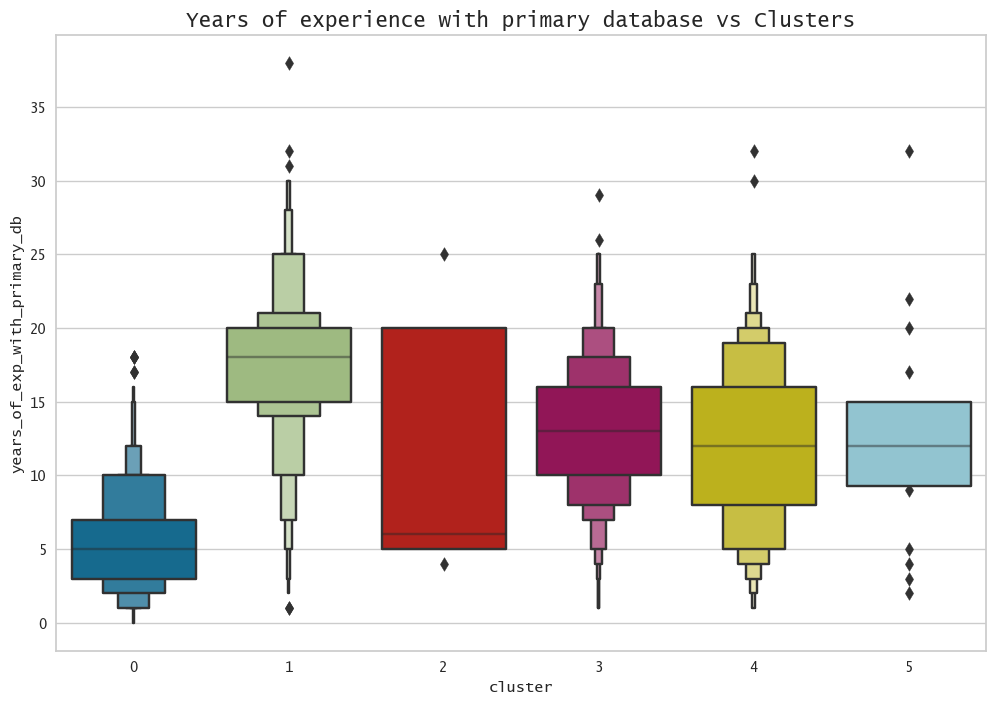

In [315]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df['cluster'], y=df['years_of_exp_with_primary_db'])
plt.title('Years of experience with primary database vs Clusters', size=15)
plt.show()

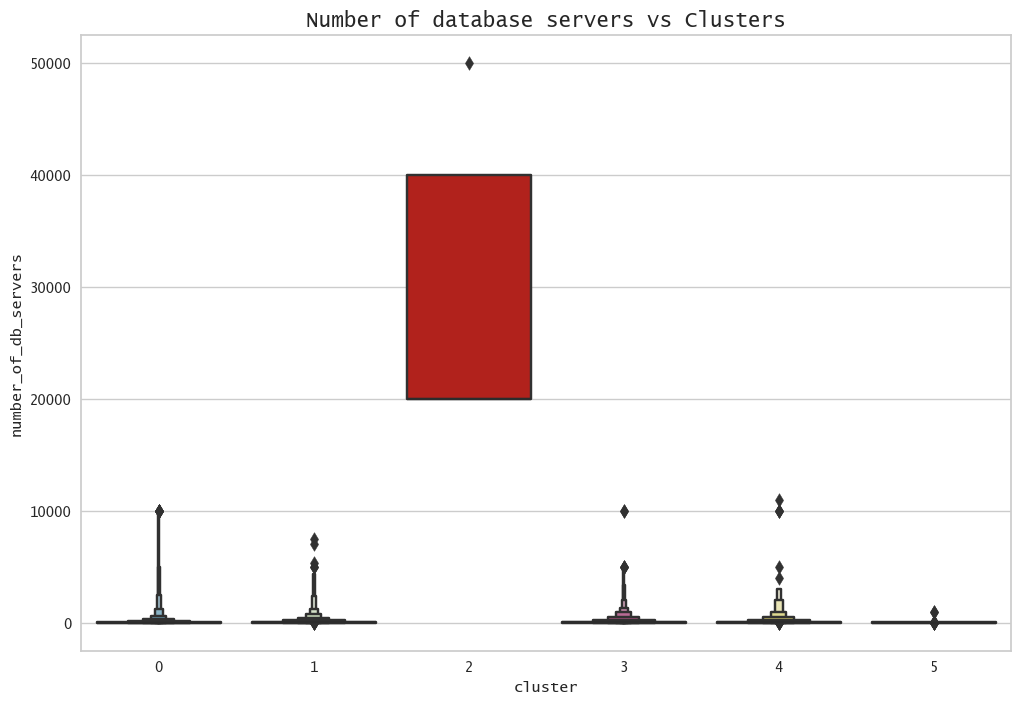

In [317]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df['cluster'], y=df['number_of_db_servers'])
plt.title('Number of database servers vs Clusters', size=15)
plt.show()

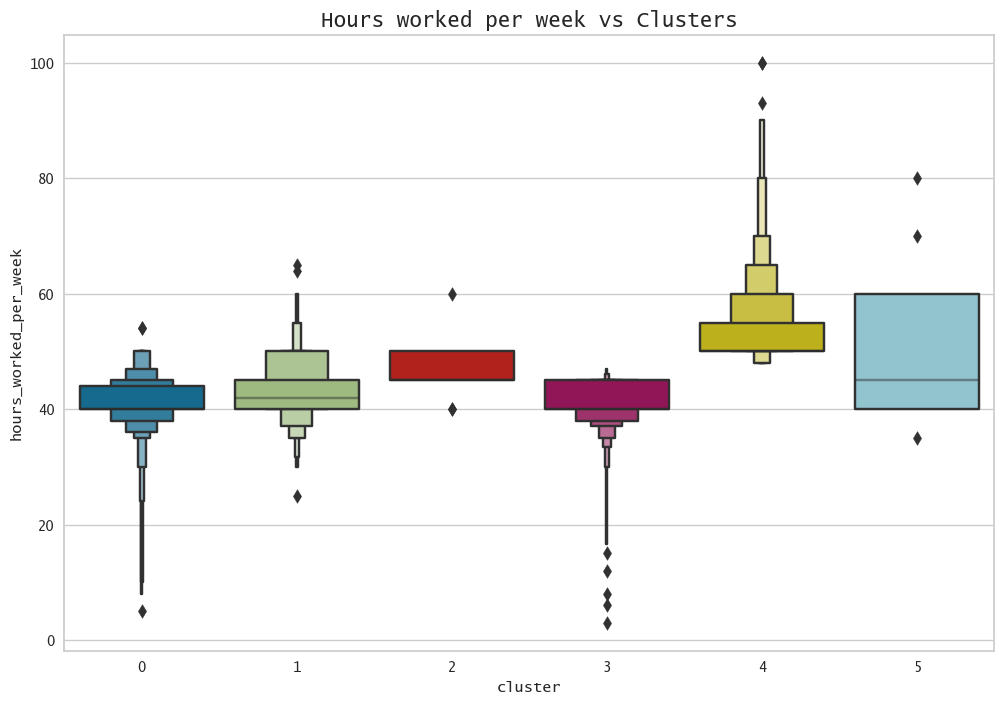

In [318]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df['cluster'], y=df['hours_worked_per_week'])
plt.title('Hours worked per week vs Clusters', size=15)
plt.show()

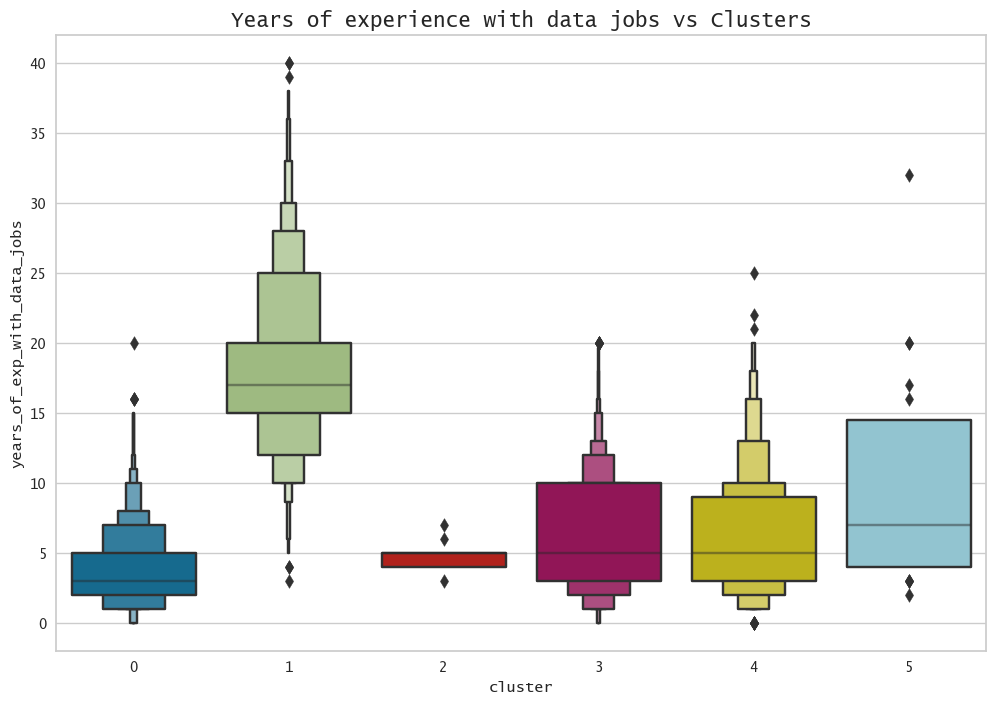

In [319]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df['cluster'], y=df['years_of_exp_with_data_jobs'])
plt.title('Years of experience with data jobs vs Clusters', size=15)
plt.show()

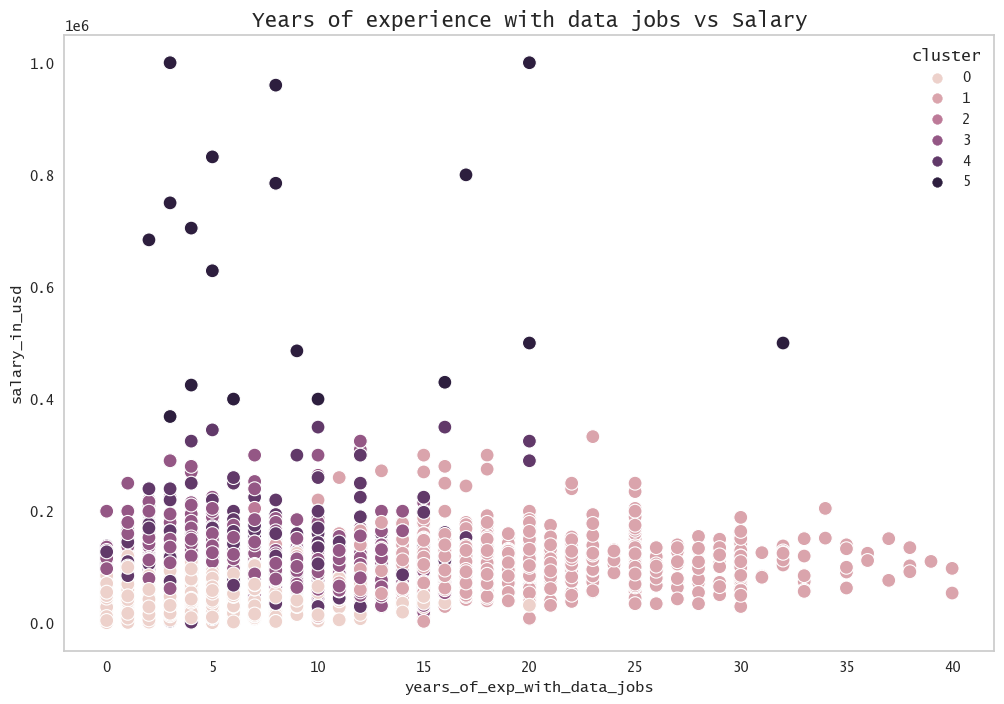

In [321]:
# plot the clusters for the 'years_of_exp_with_data_jobs' and 'salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['years_of_exp_with_data_jobs'], y=df['salary_in_usd'], hue=df['cluster'], s=100) 

ax.grid(False)
plt.title('Years of experience with data jobs vs Salary', size=15)
plt.show()

**Observation:**

Here the scatterplot shows the clusters overlapping with each other.

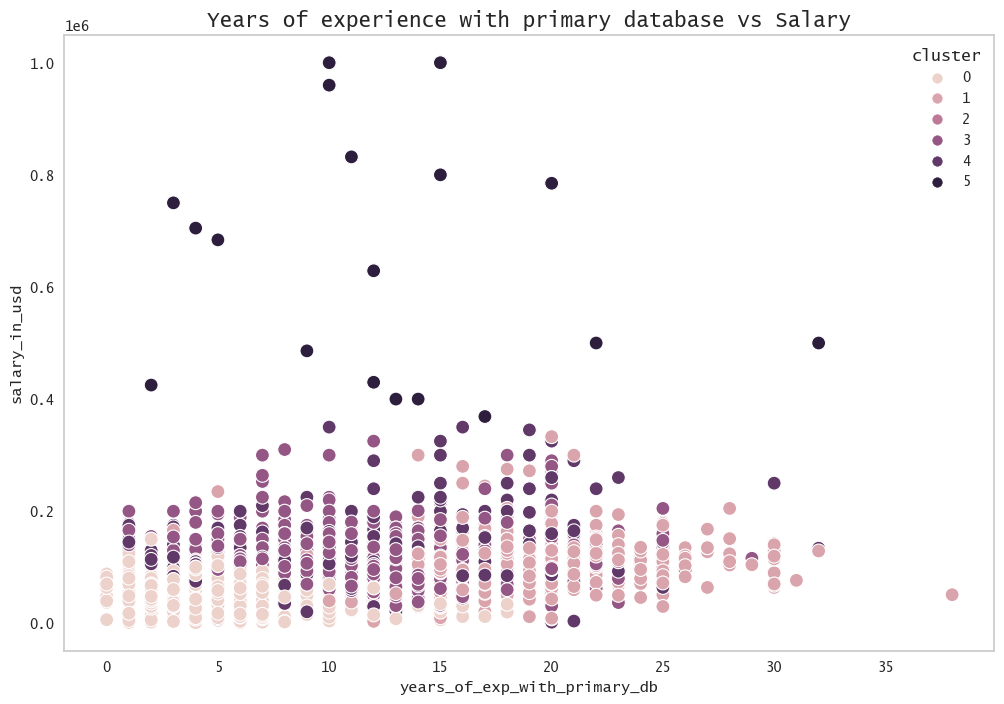

In [322]:
# plot the clusters for the 'years_of_exp_with_primary_db' and 'salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['years_of_exp_with_primary_db'], y=df['salary_in_usd'], hue=df['cluster'], s=100) 

ax.grid(False)
plt.title('Years of experience with primary database vs Salary', size=15)
plt.show()

**Observation:**

The clusters are overlapping each other, indicating that there is not enough separation in the variables being used to cluster the data. In this case, the scatterplot shows that there is not a clear separation between *Years of experience with primary database* and *Salary in USD*.

The small number of data points in cluster 5 at the top of the scatterplot suggest that these individuals have high salaries but may not necessarily have a lot of experience with primary databases. Overall, the clustering result indicates that there is not a clear pattern in the data when looking at years of experience with primary database and salary in USD.

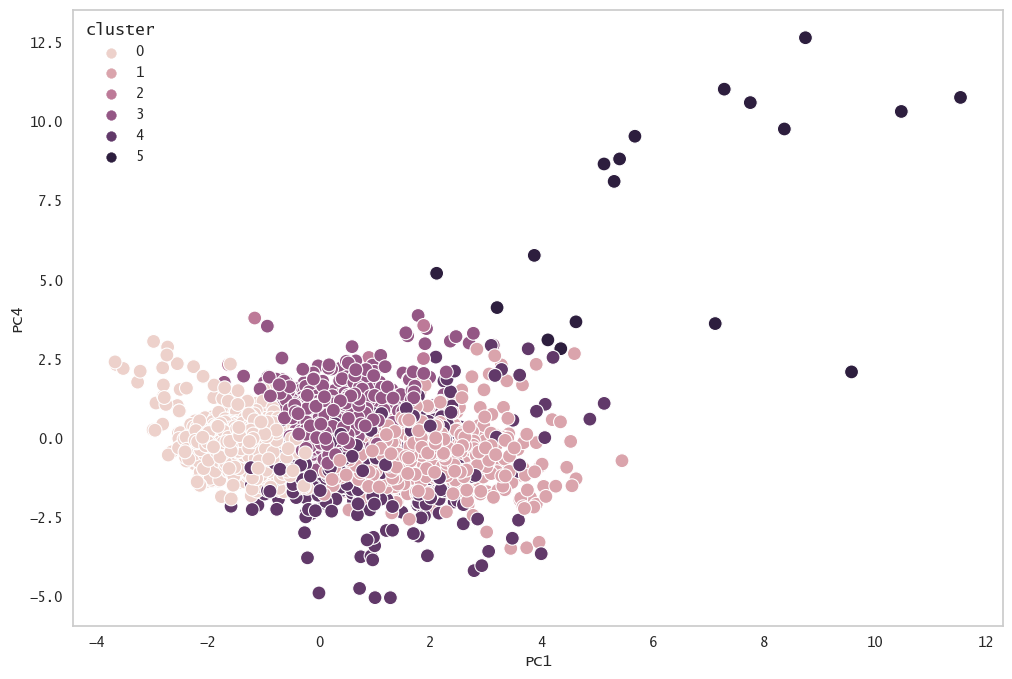

In [337]:
# plot the clusters with the components
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC4'], hue=pca_df['cluster'], s=100) 

ax.grid(False)
plt.show()

#### <a id='toc1_4_1_4_'></a>[IV.1.4. Aggregrations](#toc0_)

In [339]:
df.groupby('cluster').agg({'salary_in_usd':['mean', 'median'], 
                         'years_of_exp_with_data_jobs':['mean', 'median'], 
                         'years_of_exp_with_primary_db':['mean', 'median']})

salary_in_usd           years_of_exp_with_data_jobs         \
                 mean    median                        mean median   
cluster                                                              
0            62349.09  64000.00                        3.69   3.00   
1           107310.04 106000.00                       18.17  17.00   
2            77078.22  48000.00                        4.78   5.00   
3           107204.73 105000.00                        6.11   5.00   
4           111498.60 108000.00                        5.94   5.00   
5           647488.22 656428.50                        9.72   7.00   

        years_of_exp_with_primary_db         
                                mean median  
cluster                                      
0                               5.54   5.00  
1                              17.45  18.00  
2                              11.44   6.00  
3                              13.07  13.00  
4                              12.00  12.00  
5                              12.56  12.00

## <a id='toc1_5_'></a>[V. Reflections](#toc0_)

**Based on the means and medians of the variables, we can make some observations about the clusters:**

- Cluster 0 has the lowest salaries, the lowest years of experience with data jobs as well as the highest years of experience with primary database. This suggests that this cluster may represent data professionals who have *the lowest salaries* and *the least experience with data jobs & primary databases*.

Similarly, we can conclude the traits of workers in the other clusters:

- Cluster 1: moderate salaries, the highest experienced with data jobs & primary database.

- Cluster 2: lower salaries, less experienced with data jobs, moderately experienced with primary database.

- Cluster 3: moderate salaries, moderately experienced with data jobs, more experienced with primary database.

- Cluster 4: moderate salaries, moderately experienced with data jobs & primary database.

- Cluster 5: the highest salaries, more experienced with data jobs, moderately experienced with primary database.

## <a id='toc1_6_'></a>[VI. Data Export](#toc0_)

In [340]:
# export df in .csv format for data visualization purposes in Tableau
df.to_csv(os.path.join(repo_dir, 'data', 'prepared-data', 'salary-all.csv'), index = False)